In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
# Load dataset
df = pd.read_csv("mushrooms.csv")

In [27]:
print(df.isnull().sum()) 

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [28]:
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

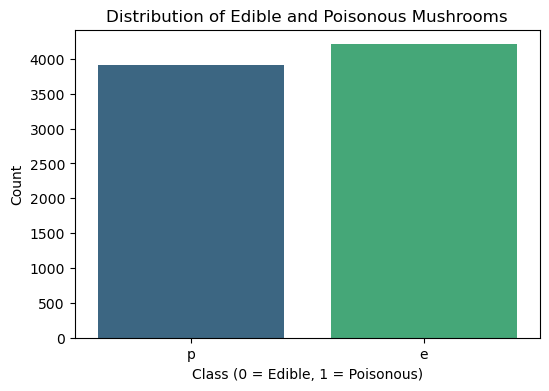

In [29]:
# Visualizing class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df, palette='viridis')
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.title("Distribution of Edible and Poisonous Mushrooms")
plt.show()

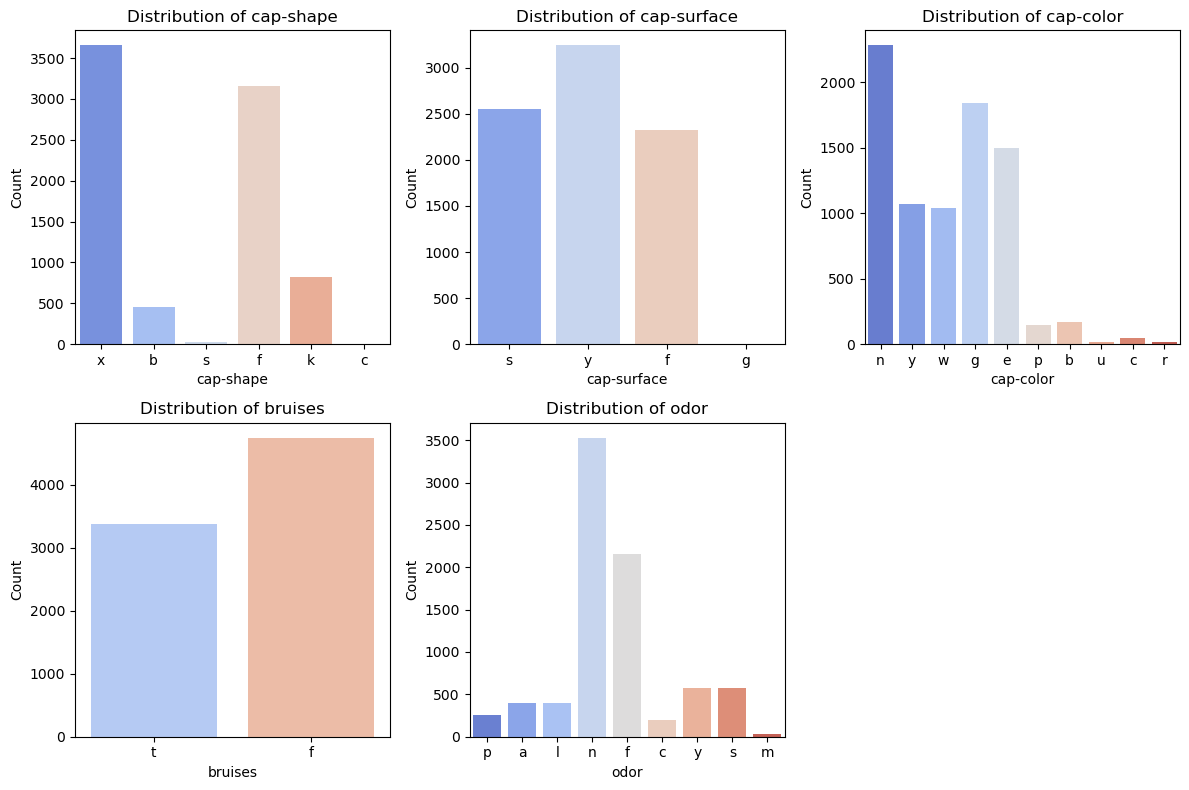

In [30]:

# Visualizing feature distributions
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[1:6], 1):  # Limiting to first 5 features for clarity
    plt.subplot(2, 3, i)
    sns.countplot(x=column, data=df, palette='coolwarm')
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

In [31]:

# Encode categorical features
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])

# Splitting dataset
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

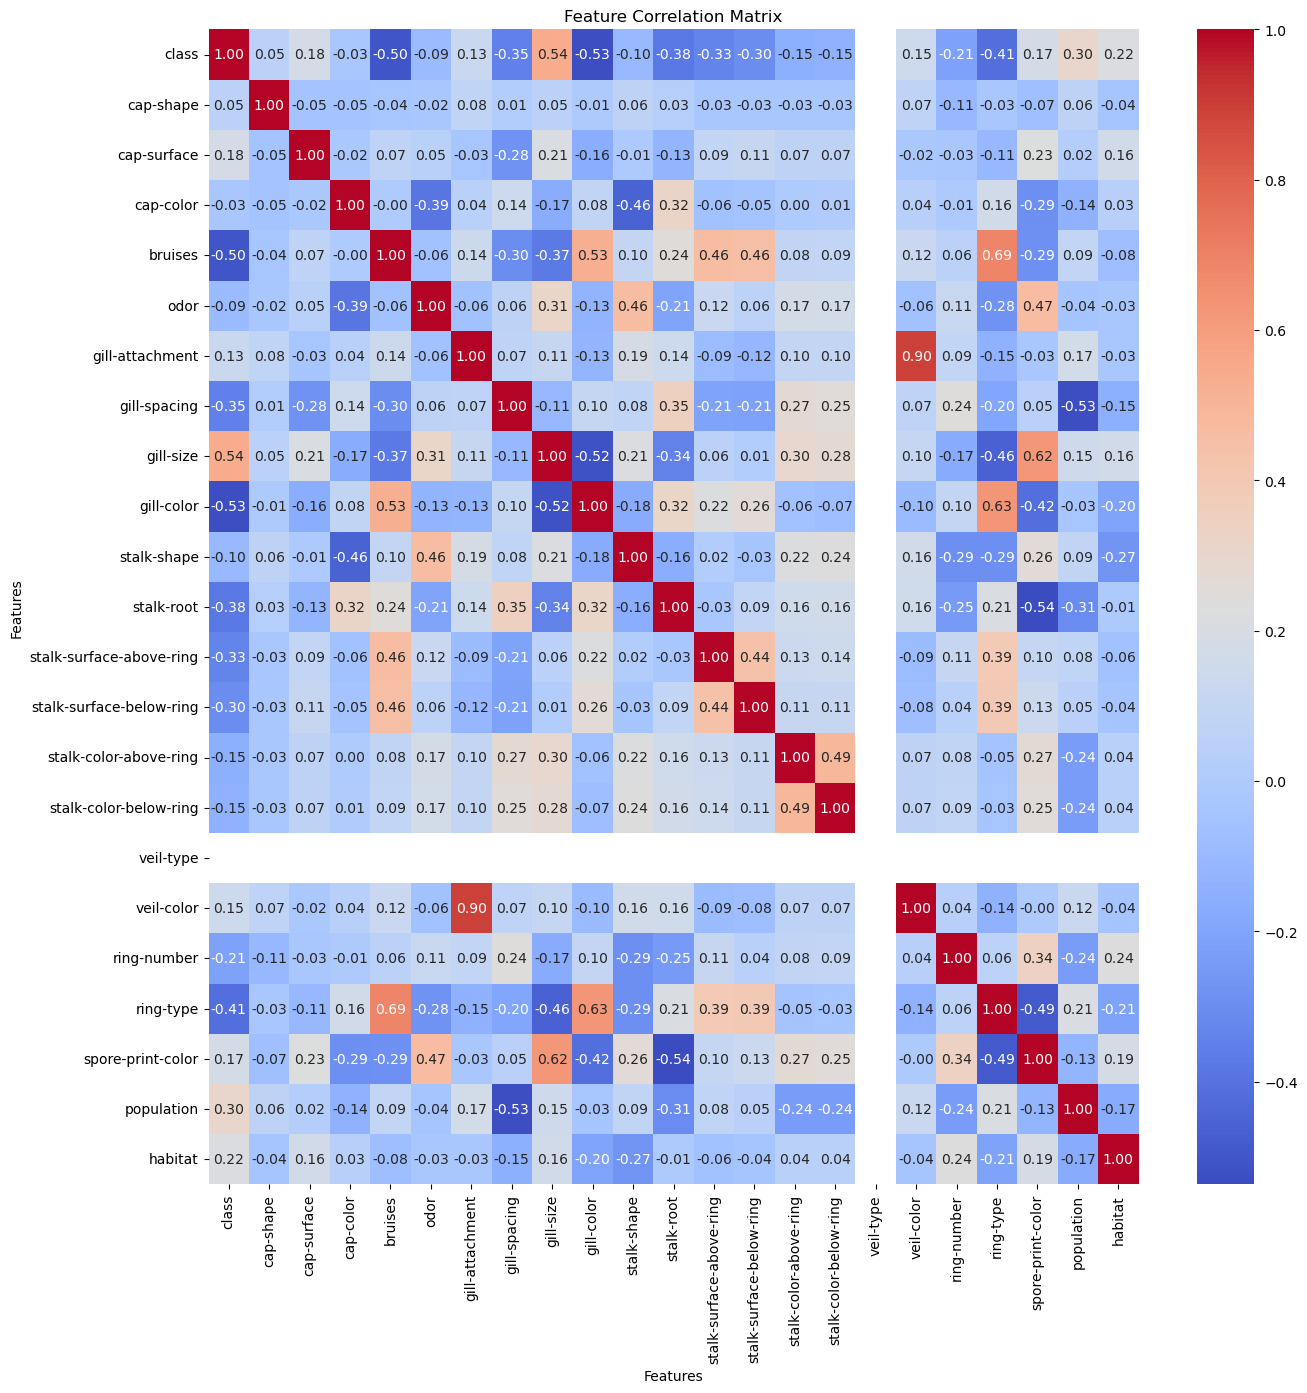

In [32]:

plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Feature Correlation Matrix")
plt.show()


In [33]:
# Apply StandardScaler for SVM and KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state = 42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

In [ ]:

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-"*50)

Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
 [[843   0]
 [  0 782]]
--------------------------------------------------
SVM Accuracy: 0.9877
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       843
           1       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

Confusion Matrix:
 [[826  17]
 [  3 779]]
--------------------------------------------------
KNN Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.0


Model Performance Table:
        Model  Accuracy
Random Forest  1.000000
          KNN  1.000000
Decision Tree  1.000000
          SVM  0.987692
  Naive Bayes  0.921846


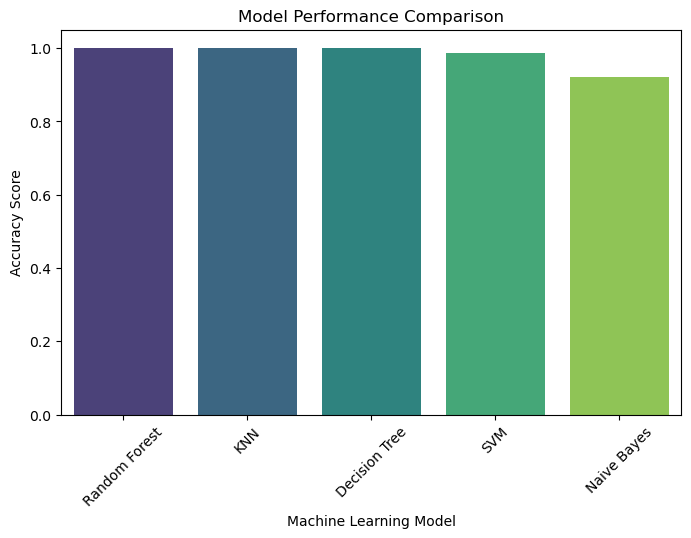

In [39]:

# Create a results table
df_results = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
df_results = df_results.sort_values(by="Accuracy", ascending=False)

# Display the results table
print("\nModel Performance Table:")
print(df_results.to_string(index=False))

# Visualize model performance
plt.figure(figsize=(8, 5))
sns.barplot(x=df_results["Model"], y=df_results["Accuracy"], palette='viridis')
plt.xlabel("Machine Learning Model")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45)
plt.show()
